In [463]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as patches

from IPython.display import GeoJSON
from shapely.geometry import Point, Polygon
import geojsonio
from geojsonio import display
import geopandas as gpd

In [481]:
province_map = gpd.read_file("limits_IT_provinces.geojson") #read geojson file from github
province_map =province_map[["prov_name","geometry"]] #we only use prov name and geometry
province_map ["centroid"] = province_map.geometry.centroid #find the centroid of all provinces
province_map

<ipython-input-481-3c1dc3e6816f>:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  province_map ["centroid"] = province_map.geometry.centroid #find the centroid of all provinces


,prov_name,geometry,centroid
0,Torino,"POLYGON ((7.89397 45.58222, 7.89654 45.57985, ...",POINT (7.43901 45.14476)
1,Vercelli,"POLYGON ((7.92900 45.74244, 7.92584 45.74196, ...",POINT (8.20922 45.52532)
2,Novara,"POLYGON ((8.42079 45.82981, 8.42028 45.83010, ...",POINT (8.55392 45.56344)
3,Cuneo,"MULTIPOLYGON (((6.94540 44.42794, 6.94734 44.4...",POINT (7.58811 44.47697)
4,Asti,"POLYGON ((7.96685 45.11667, 7.96729 45.11673, ...",POINT (8.18596 44.87763)
...,...,...,...
102,Sassari,"MULTIPOLYGON (((9.46502 40.65584, 9.46475 40.6...",POINT (8.96431 40.74701)
103,Nuoro,"MULTIPOLYGON (((9.28037 39.91741, 9.27741 39.9...",POINT (9.36904 40.18199)
104,Cagliari,"MULTIPOLYGON (((9.00622 39.32697, 9.01541 39.3...",POINT (9.10737 39.20738)
105,Oristano,"MULTIPOLYGON (((8.78200 40.18982, 8.78829 40.1...",POINT (8.71691 39.98962)


In [482]:
padova_point = province_map.loc[province_map['prov_name'] == 'Padova'] #select padova geolocation
padova_point

,prov_name,geometry,centroid
28,Padova,"POLYGON ((11.98296 45.16275, 11.98343 45.15557...",POINT (11.80793 45.34929)


In [483]:
point = padova_point.iat[0,2]

In [484]:
province_map = province_map.assign(dist_to_padova=province_map.distance(point))
province_map

<ipython-input-484-bd7a34c1d265>:1: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  province_map = province_map.assign(dist_to_padova=province_map.distance(point))


,prov_name,geometry,centroid,dist_to_padova
0,Torino,"POLYGON ((7.89397 45.58222, 7.89654 45.57985, ...",POINT (7.43901 45.14476),3.660544
1,Vercelli,"POLYGON ((7.92900 45.74244, 7.92584 45.74196, ...",POINT (8.20922 45.52532),3.230092
2,Novara,"POLYGON ((8.42079 45.82981, 8.42028 45.83010, ...",POINT (8.55392 45.56344),2.965368
3,Cuneo,"MULTIPOLYGON (((6.94540 44.42794, 6.94734 44.4...",POINT (7.58811 44.47697),3.599300
4,Asti,"POLYGON ((7.96685 45.11667, 7.96729 45.11673, ...",POINT (8.18596 44.87763),3.342157
...,...,...,...,...
102,Sassari,"MULTIPOLYGON (((9.46502 40.65584, 9.46475 40.6...",POINT (8.96431 40.74701),4.708903
103,Nuoro,"MULTIPOLYGON (((9.28037 39.91741, 9.27741 39.9...",POINT (9.36904 40.18199),5.115424
104,Cagliari,"MULTIPOLYGON (((9.00622 39.32697, 9.01541 39.3...",POINT (9.10737 39.20738),6.408252
105,Oristano,"MULTIPOLYGON (((8.78200 40.18982, 8.78829 40.1...",POINT (8.71691 39.98962),5.856631


In [485]:
#sort by minimum value of distance
province_map =province_map.sort_values(by = 'dist_to_padova', ascending = True)
province_map

,prov_name,geometry,centroid,dist_to_padova
28,Padova,"POLYGON ((11.98296 45.16275, 11.98343 45.15557...",POINT (11.80793 45.34929),0.000000
24,Vicenza,"POLYGON ((11.61227 45.32540, 11.61449 45.31729...",POINT (11.49074 45.67376),0.137307
27,Venezia,"POLYGON ((12.65668 45.79134, 12.66165 45.79243...",POINT (12.45768 45.50636),0.174037
29,Rovigo,"POLYGON ((12.02553 45.11960, 12.04500 45.11558...",POINT (11.92590 45.01046),0.223044
26,Treviso,"POLYGON ((11.80324 45.79994, 11.79414 45.79929...",POINT (12.21755 45.79463),0.278789
...,...,...,...,...
98,Enna,"MULTIPOLYGON (((14.67399 37.55798, 14.66984 37...",POINT (14.42944 37.58068),7.905629
99,Catania,"MULTIPOLYGON (((15.16974 37.57438, 15.16971 37...",POINT (14.82947 37.51236),7.974483
90,Reggio di Calabria,"POLYGON ((16.14846 38.05694, 16.14312 38.04365...",POINT (16.03176 38.23908),7.982321
101,Siracusa,"MULTIPOLYGON (((15.24732 37.24792, 15.24635 37...",POINT (15.02976 37.07578),8.517183


In [489]:
province_5_nearest = province_map.head(5)
province_5_nearest = province_5_nearest.drop(labels=28, axis=0)
province_5_nearest

,prov_name,geometry,centroid,dist_to_padova
24,Vicenza,"POLYGON ((11.61227 45.32540, 11.61449 45.31729...",POINT (11.49074 45.67376),0.137307
27,Venezia,"POLYGON ((12.65668 45.79134, 12.66165 45.79243...",POINT (12.45768 45.50636),0.174037
29,Rovigo,"POLYGON ((12.02553 45.11960, 12.04500 45.11558...",POINT (11.92590 45.01046),0.223044
26,Treviso,"POLYGON ((11.80324 45.79994, 11.79414 45.79929...",POINT (12.21755 45.79463),0.278789


In [490]:
#Select the nearest provinces to Padova
province_5_nearest = province_5_nearest.sort_values('dist_to_padova',ascending = True)
province_5_nearest

,prov_name,geometry,centroid,dist_to_padova
24,Vicenza,"POLYGON ((11.61227 45.32540, 11.61449 45.31729...",POINT (11.49074 45.67376),0.137307
27,Venezia,"POLYGON ((12.65668 45.79134, 12.66165 45.79243...",POINT (12.45768 45.50636),0.174037
29,Rovigo,"POLYGON ((12.02553 45.11960, 12.04500 45.11558...",POINT (11.92590 45.01046),0.223044
26,Treviso,"POLYGON ((11.80324 45.79994, 11.79414 45.79929...",POINT (12.21755 45.79463),0.278789


In [491]:
#Starting the main part

In [468]:
#Reading csc files
df_user = pd.read_csv('distinct_users_day.csv', sep=',', encoding='ANSI') 
df_province = pd.read_csv('codici_istat_provincia.csv', sep=',', encoding='ANSI')

#Filtering data with unknown value
df_province = df_province[df_province['COD_PRO']>0]
#Filtering by visitors
df_user_visitors = df_user[df_user['CUST_CLASS']=='visitor']
#Keeping 4 nearest province to padova that counted.
df_province = df_province[(df_province['PROVINCIA']=='Vicenza') | (df_province['PROVINCIA']=='Venezia') | (df_province['PROVINCIA']=='Treviso') | (df_province['PROVINCIA']=='Rovigo')]
#Merge 2 datasets to get all required columns.
df = df_user_visitors.merge(df_province)
#Dropping unneccessary columns.
df = df.drop('PRO_COM', 1)
df = df.drop('COD_REG', 1)
df = df.drop('PROV_SIGLA', 1)
df = df.drop('COD_COUNTRY', 1)
#Sort by number of visitors.
df = df.sort_values('VISITORS', ascending=False)
df



,DOW,CUST_CLASS,COD_PRO,VISITORS,PROVINCIA
373,Sabato,visitor,27.0,21840,Venezia
575,Venerdi,visitor,27.0,20608,Venezia
341,Mercoledi,visitor,27.0,20572,Venezia
445,Domenica,visitor,27.0,20332,Venezia
477,Giovedi,visitor,27.0,19368,Venezia
...,...,...,...,...,...
496,Venerdi,visitor,27.0,32,Venezia
982,Mercoledi,visitor,24.0,32,Vicenza
1162,Venerdi,visitor,24.0,32,Vicenza
114,Giovedi,visitor,29.0,32,Rovigo


In [470]:
#Grouping provinces to directions
direction = []
for i in df['PROVINCIA']:
    if i == 'Rovigo':
        direction.append('S')
    elif i == 'Vicenza':
        direction.append('E')
    else:
        direction.append('W')

df['Directions'] = direction
        
df

,DOW,CUST_CLASS,COD_PRO,VISITORS,PROVINCIA,Directions
373,Sabato,visitor,27.0,21840,Venezia,W
575,Venerdi,visitor,27.0,20608,Venezia,W
341,Mercoledi,visitor,27.0,20572,Venezia,W
445,Domenica,visitor,27.0,20332,Venezia,W
477,Giovedi,visitor,27.0,19368,Venezia,W
...,...,...,...,...,...,...
496,Venerdi,visitor,27.0,32,Venezia,W
982,Mercoledi,visitor,24.0,32,Vicenza,E
1162,Venerdi,visitor,24.0,32,Vicenza,E
114,Giovedi,visitor,29.0,32,Rovigo,S


In [466]:
#Weekend days,sum and sort of them based on most visitors.
df_Weekend = df[df['DOW'].str.match('Sabato', 'Domenica')]
df_sum_provinces = df_Weekend.groupby(['PROVINCIA']).sum().reset_index()
df_sum_provinces = df_sum_provinces.sort_values('VISITORS',ascending = False)
df_sum_provinces

,PROVINCIA,COD_PRO,VISITORS
2,Venezia,1188.0,94052
3,Vicenza,2328.0,70716
1,Treviso,2262.0,47520
0,Rovigo,1276.0,28228


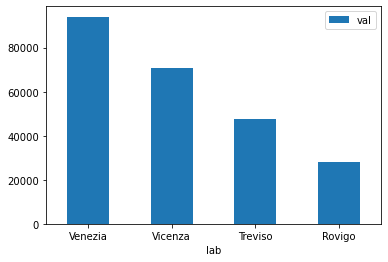

In [459]:
#Plotting provinces with most visitors during weekends.
df = pd.DataFrame({'lab':['Venezia', 'Vicenza', 'Treviso', 'Rovigo'], 'val':[94052, 70716, 47520, 28228
]})
ax = df.plot.bar(x='lab', y='val', rot=0)


In [467]:
df_sum_directions = df_Weekend.groupby(['Directions']).sum().reset_index()
df_sum_directions = df_sum_directions.sort_values('VISITORS',ascending = False)
df_sum_directions

,Directions,COD_PRO,VISITORS
2,W,3450.0,141572
0,E,2328.0,70716
1,S,1276.0,28228


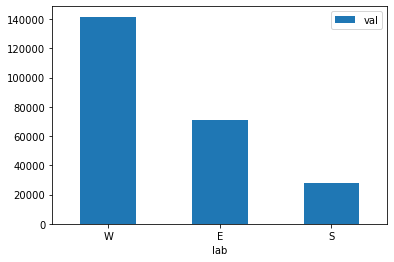

In [461]:
#Plotting weekend flux, focus on directions.
df = pd.DataFrame({'lab':['W', 'E', 'S'], 'val':[141572, 70716, 28228
]})
ax = df.plot.bar(x='lab', y='val', rot=0)


In [473]:
df_working = df[(df['DOW'] != 'Sabato') & (df3['DOW'] != 'Domenica') ]
df_sum_working = df_working.groupby(['Directions','DOW', 'PROVINCIA']).sum().reset_index()
df_sum_working

<ipython-input-473-681c2c4fa02e>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_working = df[(df['DOW'] != 'Sabato') & (df3['DOW'] != 'Domenica') ]


,Directions,DOW,PROVINCIA,COD_PRO,VISITORS
0,E,Giovedi,Vicenza,2304.0,55876
1,E,Lunedi,Vicenza,2304.0,57344
2,E,Martedi,Vicenza,2256.0,57304
3,E,Mercoledi,Vicenza,2352.0,60844
4,E,Venerdi,Vicenza,2304.0,62884
5,S,Giovedi,Rovigo,1218.0,20568
6,S,Lunedi,Rovigo,1218.0,21412
7,S,Martedi,Rovigo,1218.0,21600
8,S,Mercoledi,Rovigo,1218.0,22448
9,S,Venerdi,Rovigo,1218.0,22544


In [474]:
#Province with most visitors during daily working days.
df_sum_working_p = df_sum_working.groupby(['PROVINCIA', 'Directions']).sum().reset_index()
df_sum_working_p = df_sum_working_p.sort_values('VISITORS',ascending = False)
df_sum_working_p

,PROVINCIA,Directions,COD_PRO,VISITORS
2,Venezia,W,5805.0,438196
3,Vicenza,E,11520.0,294252
1,Treviso,W,11336.0,220156
0,Rovigo,S,6090.0,108572


In [475]:
#Direction with most numbers of visitors during daily working days
df_sum_working_d = df_working.groupby(['Directions', 'PROVINCIA']).sum().reset_index()
df_sum_working_d = df_sum_working.sort_values('VISITORS',ascending = False)
df_sum_working_d

,Directions,DOW,PROVINCIA,COD_PRO,VISITORS
19,W,Venerdi,Venezia,1188.0,91376
17,W,Mercoledi,Venezia,1161.0,90408
11,W,Giovedi,Venezia,1161.0,86604
15,W,Martedi,Venezia,1161.0,85292
13,W,Lunedi,Venezia,1134.0,84516
4,E,Venerdi,Vicenza,2304.0,62884
3,E,Mercoledi,Vicenza,2352.0,60844
1,E,Lunedi,Vicenza,2304.0,57344
2,E,Martedi,Vicenza,2256.0,57304
0,E,Giovedi,Vicenza,2304.0,55876


In [476]:
#Sum of visitors at daily working days.
df_sum_days = df_sum_working_d.groupby(['PROVINCIA']).sum().reset_index()
df_sum_days
df_sum_days = df_sum_days.sort_values('VISITORS',ascending = False)
df_sum_days

,PROVINCIA,COD_PRO,VISITORS
2,Venezia,5805.0,438196
3,Vicenza,11520.0,294252
1,Treviso,11336.0,220156
0,Rovigo,6090.0,108572


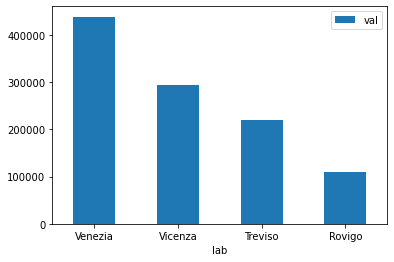

In [477]:
#Plotting the provinces eith most number of visitors during daily working days.
df = pd.DataFrame({'lab':['Venezia', 'Vicenza', 'Treviso', 'Rovigo'], 'val':[438196, 294252, 220156, 108572,  
]})
ax = df.plot.bar(x='lab', y='val', rot=0)

In [478]:
#Sum of visitors at daily working days.
df_sum_working_d = df_sum_working_d.groupby(['DOW']).sum().reset_index()
df_sum_working_by_days = df_sum_working_d.sort_values('VISITORS',ascending = False)
df_sum_working_by_days

,DOW,COD_PRO,VISITORS
4,Venerdi,6998.0,223704
3,Mercoledi,6993.0,219044
2,Martedi,6897.0,207352
0,Giovedi,6945.0,205680
1,Lunedi,6918.0,205396


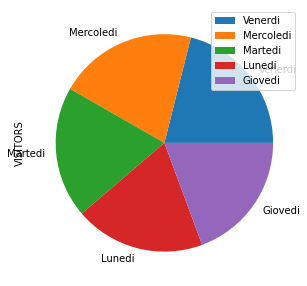

In [480]:
#Sum of visitors in daily working days in all provinces, indicates there is not enormous difference between working days.
df = pd.DataFrame({'VISITORS': [223704
 , 219044, 207352, 205680, 205396]},
                  index=['Venerdi', 'Mercoledi', 'Martedi', 'Lunedi', 'Giovedi'])
plot = df.plot.pie(y='VISITORS', figsize=(5, 5))